## Discrete Uniform Distribution

Discrete Uniform Distribution adalah istilah untuk menandakan bahwa setiap anggota di himpunan punya probabilitas yang sama.
Contohnya adalah saat kita roll a dice, maka setiap angka punya probabilitas yang muncul 1/6

Contoh dengan Python:

In [14]:
# Import all the usual imports from the Python for Data Analysis and Visualization Course.
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Probability Mass Function for Dice Roll')

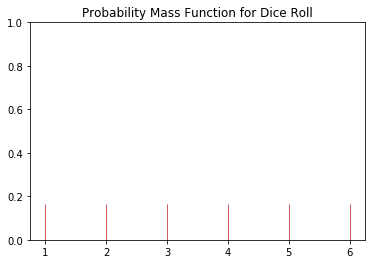

In [3]:
#mencoba dengan melihat dadu
roll_options = [1,2,3,4,5,6]

#total probability space? 
#total probability space adalah total dari semua probability yang ada, seharusnya bernilai satu 
tprob = 1

# Each roll has same odds of appearing (on a fair die at least)
prob_roll = tprob / len(roll_options)

# Plot using seaborn rugplot (note this is not really a rugplot), setting height equal to probability of roll
uni_plot = sns.rugplot(roll_options,height=prob_roll,c='indianred')

# Set Title
uni_plot.set_title('Probability Mass Function for Dice Roll')

In [5]:
#create discrete uniform distribution using scipy 
from scipy.stats import randint

#set low and high boundaries of a dice 
#high 7 karena index dimulai dari 0
#tapi kenapa low tidak 0? tidak dijelaskan oleh tutor 
low, high = 1,7

#mencari mean dan variance 
mean, var = randint.stats(low,high)

print("The mean is %2.1f" % mean)
print("The variance is %2.1f" % var)

The mean is 3.5
The variance is 2.9


<BarContainer object of 6 artists>

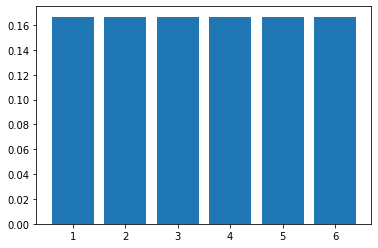

In [6]:
#melihat distribusi dalam bentuk barplot
plt.bar(roll_options, randint.pmf(roll_options, low, high))

### Discrete Uniform Distribution - Germant Tank Problem

In [1]:
#Dokumentasi: https://en.wikipedia.org/wiki/German_tank_problem

#RUMUS MENCARI POPULASI MAKSIMUM 

# POPULATION MAX = SAMPLE MAX + (SAMPLE MAX/SAMPLE SIZE) - 1

#### Contoh: 

If we for instance captured 5 tanks with the serial numbers 3,7,11,16 then we know the max observed serial number was m=16. This is our sample max with a sample size of 5 tanks. Plugging into the MVUE results in:

In [4]:
#masih tidak mengerti kenapa sample size adalah 5, bukan seharusnya 4? 
#Untuk saat ini, saya menganggap bahwa contoh soal ini salah, oleh karena itu, saya memakai angka 4 untuk sample size

#Soal ini didapatkan di dokumentasi jmportilla di nbviewer (https://nbviewer.jupyter.org/github/jmportilla/Statistics-Notes/blob/master/Discrete%20Uniform%20Distributions.ipynb)

tank_estimate = 16 + (16/4) - 1
tank_estimate

19.0

In [5]:
#UNTUK APPROACH SECARA BAYESIAN 

#Sebenarnya saya masih belum begitu mengerti terkait teori Bayes, cuma rumusnya adalah seperti ini: 
m=16
#k merupakan sample size
k=4

tank_b_estimate = (m-1) * ((k-1) / (k-2))
tank_b_estimate

22.5

## Continuous Uniform Distribution

In [6]:
#Probabilitas untuk Continuous Uniform Distribution: 

#Rumus: 1/(b-a) di mana b merupakan max dari range, sedangkan a merupakan min dari range 

#Mean: (a+b)/2

#Variance: a^2 = (b-a)^2/12 

#### Contoh: 

So what would an example problem look like? Let's say on average, a taxi ride in NYC takes 22 minutes. After taking some time measurements from experiments we gather that all the taxi rides are uniformly distributed between 19 and 27 minutes. What is the probability density function of a taxi ride, or f(x)?

In [7]:
#Jawaban

#Lower bound time 
a = 19 

#Upper bound tie
b = 27 

#Probability density function 
fx = 1.0/(b-a)

#show
print('probability density function results in %1.3f' %fx)

probability density function results in 0.125


In [10]:
#cek variance
var = ((b-a)**2 )/12

print('the variance of the continuous uniform distribution is %1.1f' %var)

the variance of the continuous uniform distribution is 5.3


#### Soal lain: 

So let's ask the question, what's the probability that the taxi ride will last at least 25 minutes?

In [ ]:
##### This is the same as the PDF of f(27) (the entire space) minus the probability space less than 25 minutes.

#f(27)
fx_1 = 27.0/(b-a)

#f(25)
fx_2 = 25.0/(b-a)

#answer
#answer ini merupakan range, dari lower bound yang merupakan f(25) dengan upper bound yang merupakan f(27)

#sebenarnya masuk akal, karena kalau soal, misal at least dalam waktu lower bound time (19)
#maka probabilitas di mana waktu range ada di antara 19 menit sampai 27 menit pasti 1
#yang artinya waktu sampai pasti diantara 19-27 menit 
ans = fx_1 - fx_2

#show
print('The probability that the taxi will last at least 25 minutes is %2.1f%%' %(100*ans))

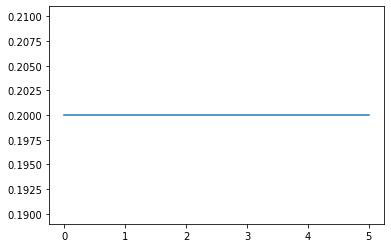

In [15]:
#doing Scipy secara automatis 
from scipy.stats import uniform
import numpy as np

A = 0
B = 5

# Set x as 100 linearly spaced points between A and B
x = np.linspace(A,B,100)

# Use uniform(loc=start point,scale=endpoint)
rv = uniform(loc=A,scale=B)

#Plot the PDF of that uniform distirbution
plt.plot(x,rv.pdf(x))

Note the above line is at 0.2, as we would expect since 1/(5-0) is 1/5 or 0.2.

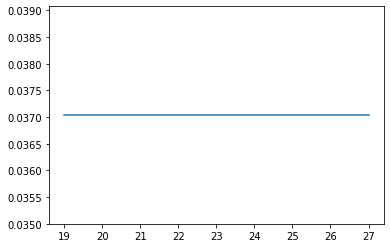

In [17]:
#bagaimana kalau a dan b nya sama seperti soal? 
#doing Scipy secara automatis 
from scipy.stats import uniform
import numpy as np

A = 19
B = 27

# Set x as 100 linearly spaced points between A and B
x = np.linspace(A,B,100)

# Use uniform(loc=start point,scale=endpoint)
rv = uniform(loc=A,scale=B)

#Plot the PDF of that uniform distirbution
plt.plot(x,rv.pdf(x))

#jawabannya sangat berbeda dari hanya menggunakan kalkulasi 

That's it for Uniform Continuous Distributions. Here are some more resource for you:¶

1.)http://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29

2.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

3.)http://mathworld.wolfram.com/UniformDistribution.html

### Binomial Distribution

In [18]:
#masih perlu mengerti perbedaan antara kombinasi dengan pengulangan dan kombinasi tanpa pengulangan

In [1]:
#dokumentasi tutor mengenai binomial distribution: https://nbviewer.jupyter.org/github/jmportilla/Statistics-Notes/blob/master/Binomial%20Distribution.ipynb

#### Soal: 

Example 1: Two players are playing basketball, player A and player B. Player A takes an average of 11 shots per game, and has an average success rate of 72%. Player B takes an average of 15 shots per game, but has an average success rate of 48%.

Question 1: What's the probability that Player A makes 6 shots in an average game?

Question 2: What's the probability that Player B makes 6 shots in an average game?

In [2]:
#Rumus untuk mencari binomial distribution probability mass function ada di dokumentasi

In [5]:
#Menjawab pertanyaan untuk Player A 

#Probability of succes player A
p_A = .72

#Number of shot for A
n_A = 11

#Make 6 shots success in average game 
k = 6 

#Import scipy for combination 
#ADA PERBEDAAN DARI DI DOKUMENTASI
#Di dokumentasi scipy.misc tapi katanya udah deprecated jadi pake scipy.special 
import scipy.special as sc

#Set up C(n,k)
comb_A = sc.comb(n_A,k)

#masukkan ke dalam rumus binomial distribution 
answer_A = comb_A * (p_A ** k) * ((1-p_A)**(n_A-k))

#dijadikan persen 
answer_A = 100*answer_A

#repeat all step for B
p_B = .48
n_B = 15
comb_B = sc.comb(n_B, k)
answer_B = 100 * comb_B * (p_B ** k) * ((1-p_B)**(n_B-k))

print('The probability of player A making 6 shots in an average game is %1.1f%%' %answer_A)
print('\n')
print('The probability of player B making 6 shots in an average game is %1.1f%%' %answer_B)

The probability of player A making 6 shots in an average game is 11.1%


The probability of player B making 6 shots in an average game is 17.0%


Terlihat bahwa meskipun A memiliki success rate yang lebih tinggi dari B (A = 72%, sementara B = 47%), probabilitas bahwa B menghasilkan 6 shots dalam sebuah game lebih tinggi dari A. Hal ini dikarenakan B juga dikarenakan B mengambil shots yang lebih banyak dari A (B shots 15, A shots 11)

Tapi apa yang akan terjadi jikalau success shot-nya lebih tinggi, misal k=6? 

In [14]:
#Maka algoritmanya: 

k = 9

comb_A = sc.comb(n_A,k)
comb_B = sc.comb(n_B,k)

answer_A = 100 * comb_A * (p_A ** k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B ** k) * ((1-p_B)**(n_B-k))

#Jawaban w/o  didefinisikan kembali kombinasi: 
# Answer_A = 188.3% which is not make sense
# Answer_B = 13.4% tepat seperti yang ada di kunci jawaban 

#Anehnya adalah kedua jawaban tidak satu suara, maksudnya seharusnya kalau A salah B juga salah, begitu juga sebaliknya
#Kalau hal itu terjadi, setidaknya saya jadi tahu bahwa kalkulasinya memang salah 

#Saya ngerti sekarang
#Ternyata memang kalkulasinya salah. Memang harus didefinisikan combination lagi
#Karena kalau comb_A ataupun comb_B tidka didefinisikan, maka memakai rumus kombinasi yang lama, yaitu yang k=6 
#Lalu kalau kalkulasinya salah, kenapa bisa probabilitas dari B benar? 
#Ternyata memang coincidence saja. Baik k=6 maupun k=9, sepertinya menghasilkan nilai kombinasi yang sama untuk B 
print('The probability of player A making 9 shots in an average game is %1.1f%%' %answer_A)
print('\n')
print('The probability of player B making 9 shots in an average game is %1.1f%%' %answer_B)

The probability of player A making 9 shots in an average game is 22.4%


The probability of player B making 9 shots in an average game is 13.4%


Jika melihat pada hasil di atas, terlihat bahwa level kemampuan player A sekarang (terlihat dari success rate), membuat player A lebih unggul jika menghasilkan success shot sebanyak 9 kali. 

Ingat: success shot 9 kali, bukan "setidaknya" success shot sebanyak 9 kali 

#### Investigate the mean and std of binomial distribution

Untuk rumus jelas, ada di dokumentasi

Mean disini merupakan rata-rata dari player dalam melakukan success shot 

In [16]:
#mean
mu_A = n_A * p_A 
mu_B = n_B * p_B 

#standard deviation
sigma_A = ( n_A * p_A * (1-p_A) )**0.5
sigma_B = ( n_B * p_B * (1-p_B) )**0.5

print('\n')
print('Player A will make an average of %1.0f +/- %1.0f success shots per game' %(mu_A, sigma_A))
print('\n')
print('Player B will make an average of %1.0f +/- %1.0f success shots per game' %(mu_B, sigma_B))
print('\n')
print("NOTE: It's impossible to make a decimal of a shot so '%1.0f' was used to replace the float!")



Player A will make an average of 8 +/- 1 success shots per game


Player B will make an average of 7 +/- 2 success shots per game


NOTE: It's impossible to make a decimal of a shot so '%1.0f' was used to replace the float!


In [31]:
#Make binomial distribution secara automatis 
from scipy.stats import binom 

#memasukkan nilai n (total trial) dan nilai p (probabilitas success)

#pendefinisian dua variabel
#kalau kita mendefinisikan satu saja, misal: 
arr = binom.stats(n_A,p_A)
#maka tipe data dari yang kita definisikan itu adalah tuple, 
print(type(arr))

#yaitu tuple yang isinya adalah mean dan variance 
print(arr)

#jika kita mendefinisikan dua-duanya, maka tuple tersebut terpisah dan menghasilkan nilai sendiri2 yang bertipe data array
mean,var = binom.stats(n_A,p_A)

print(mean)
print(var**0.5)


<class 'tuple'>
(array(7.92), array(2.2176))
7.92
1.4891608375189027


terlihat bahwa rata-rata dan std bisa diambil secara automatis dengan menggunakan scipy, meski yang kita ambil merupakan nilai yang tidak bulat

In [28]:
#membuat nilai rata-rata dan mean menjadi nilai bulat: 

#tidak bisa menggunakan method round karena ternyata tipe dari mean dan var adalah ndarray dari numpy 
#oleh karena itu mau mencoba menggunakan method round dari numpy, yaitu around()
import numpy as np

print(np.around(mean))
print(np.around(var**0.5))

#berhasil

8.0
1.0


#### Probabiliy Mass Function

In [32]:
#Sejujurnya PDF merupakan rumus yang tidak begitu saya mengerti 

#### Contoh: 

Imagine you flip a fair coin. Your probability of getting a heads is p=0.5 (success in this example).
So what does your probability mass function look like for 10 coin flips?

In [33]:
#Meski demikian, ada dokumentasi yang menggambarkan pengertian dari PMF: 
# https://www.statisticshowto.com/probability-mass-function-pmf/

In [34]:
#Jawaban dari soal: 

#n = 10 coin flips & p = 0.5 untuk tiap kalo coin flips 
n=10
p=0.5

#index starts with 0, jadi dibuat n+1
# x digunakan untuk n success (berapa kali koin menampilkan gambar head)
x = range(n+1)

#membuat pmf secara automatis 
Y = binom.pmf(x,n,p)

#show 
Y

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

Text(0, 0.5, 'Probability')

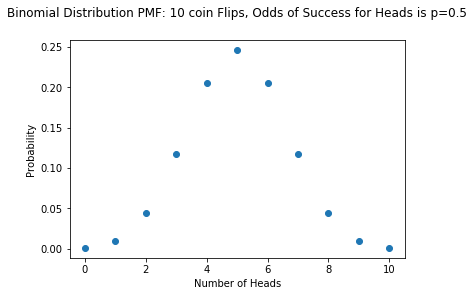

In [36]:
import matplotlib.pyplot as plt

#karena simple plot, jadi menggunakan matplotlib
plt.plot(x,Y,'o')

#Title (use y=1.08 to raise the long title a little more above the plot)
plt.title('Binomial Distribution PMF: 10 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)

#Axis Titles
plt.xlabel('Number of Heads')
plt.ylabel('Probability')

Terlihat bahwa probabilitas bahwa dari 10 percobaan mendapat 10 kali head, sangat kecil. Begitu pun tidka mendapatkan head sama sekali

Dokumentasi lebih lanjut tentang binomial distribution:

1.) http://en.wikipedia.org/wiki/Binomial_distribution

2.) http://stattrek.com/probability-distributions/binomial.aspx

3.) http://mathworld.wolfram.com/BinomialDistribution.html